<a href="https://colab.research.google.com/github/Ajimct007/Projects/blob/main/Machine_Learning/Tasks/01_Fires_from_Space_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01_Fires_from_Space_Australia/fire_nrt_V1_96617.csv')
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [ ]:
df.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

In [ ]:
df.shape

(956257, 14)

In [ ]:
df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000


In [ ]:
columns = df.columns
for i in columns:
  print(i)
  unq = df[i].unique()
  print(unq)

latitude
[-42.69706 -42.26889 -40.85202 ... -32.66712 -32.58616 -33.37853]
longitude
[147.70634 147.31104 145.38068 ... 115.94735 115.75078 115.75043]
bright_ti4
[333.6 336.2 327.9 346.9 334.1 353.9 338.7 337.1 327.1 332.8 328.4 344.8
 339.7 329.8 339.4 336.7 327.7 346.1 333.7 346.8 344.6 352.3 335.2 338.9
 330.  332.3 340.2 337.5 338.4 344.  337.  337.9 345.8 327.5 343.  331.
 330.4 346.4 338.1 367.  335.  352.1 332.1 347.3 346.6 347.2 331.6 342.5
 336.1 340.9 342.6 351.3 341.3 340.  347.1 343.7 355.9 341.5 349.5 356.1
 330.2 342.3 341.7 330.5 332.6 340.4 331.5 340.6 347.9 345.2 349.8 354.3
 343.9 354.7 354.5 351.2 348.  340.5 355.1 343.4 349.4 348.5 350.6 334.4
 331.7 351.6 351.5 356.4 345.1 347.8 353.2 346.  338.2 341.1 355.6 335.5
 334.2 340.7 343.3 345.  341.6 350.5 354.  348.6 345.7 344.3 354.4 348.1
 348.3 347.4 344.1 350.8 350.4 349.7 351.1 338.5 342.1 343.6 341.8 352.7
 345.4 334.6 340.8 342.  336.8 330.7 342.2 343.2 331.8 333.1 354.2 341.2
 355.7 356.2 332.4 330.1 336.6 339.9

In [ ]:
df.drop(columns=['satellite', 'instrument', 'version'], inplace=True)

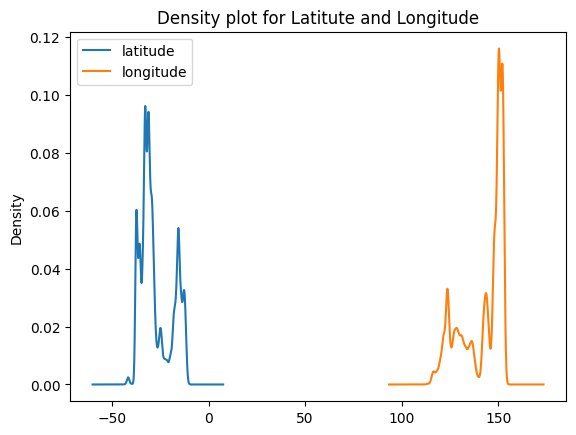

In [ ]:
df['latitude'].plot(kind='kde', label = 'latitude')
df['longitude'].plot(kind = 'kde', label = 'longitude')
plt.title('Density plot for Latitute and Longitude')
plt.legend()

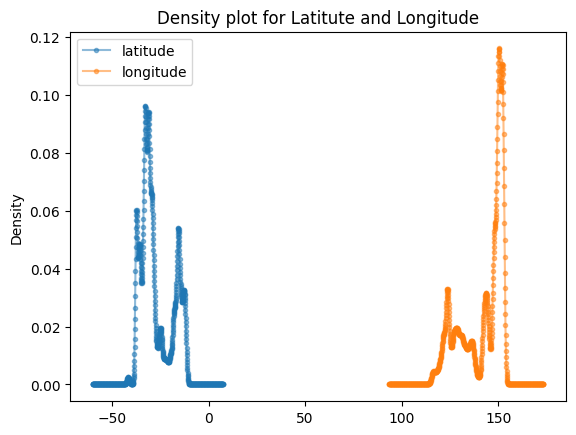

In [ ]:
df['latitude'].plot(kind='kde', label = 'latitude', alpha=0.5, marker='.')
df['longitude'].plot(kind = 'kde', label = 'longitude', alpha=0.5, marker='.')
plt.title('Density plot for Latitute and Longitude')
plt.legend()

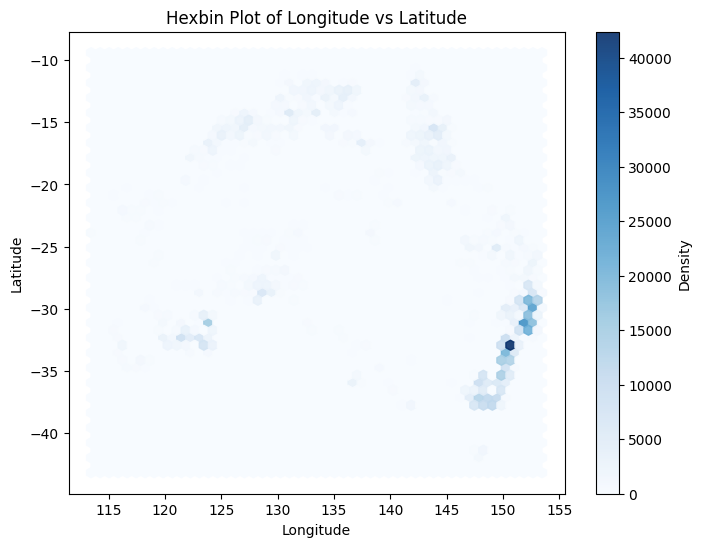

In [ ]:
# Create a hexbin plot
plt.figure(figsize=(8, 6))
hb = plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='Blues', alpha = 0.9)
plt.colorbar(hb, label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Longitude vs Latitude')
plt.show()

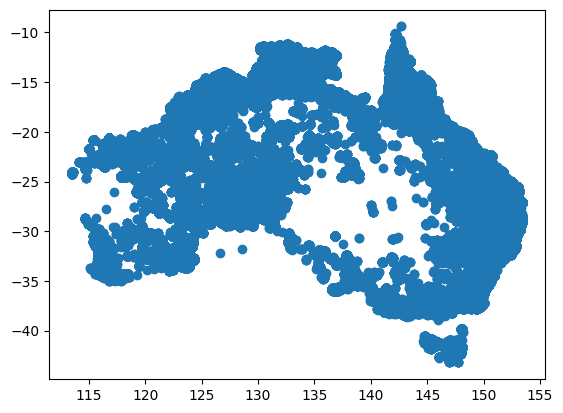

In [ ]:
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

In [ ]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,n,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,n,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,n,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,n,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,n,293.5,4.1,D


In [ ]:
import folium

# Example latitude and longitude data for cities
latitudes = df['latitude'].head(1000)
longitudes = df['longitude'].head(1000)

# Create a map centered on Australia
m = folium.Map(location=[-25, 135], zoom_start=4)

# Add markers for each data point
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(m)

# Display the map
m


In [ ]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,n,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,n,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,n,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,n,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,n,293.5,4.1,D


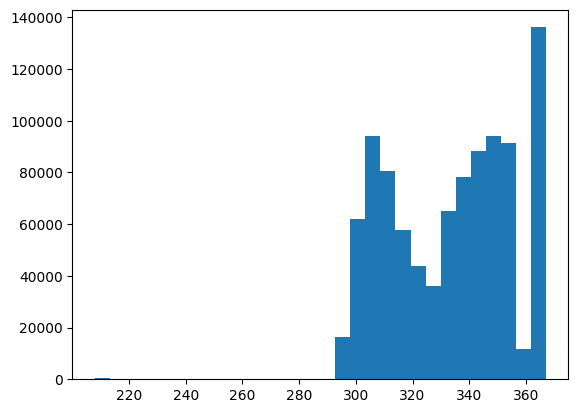

In [ ]:
plt.hist(df['bright_ti4'], bins = 30)
plt.show()

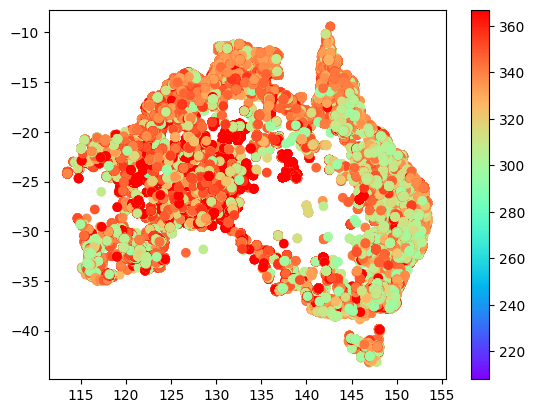

In [ ]:
plt.scatter(x = df['longitude'], y = df['latitude'], c = df['bright_ti4'], cmap = 'rainbow')
plt.colorbar()
plt.show()